## 신경망과 딥러닝
# 개와 고양이 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### 디렉토리에서 파일 불러오기
- cats_and_dogs_small<br>
    - test
        - cats : cat.0.jpg ~ cat.999.jpg
        - dogs : dog.0.jpg ~ dog.999.jpg
    - train
        - cats : cat.1000.jpg ~ cat.1499.jpg
        - dogs : dog.1000.jpg ~ dog.1499.jpg
    - validation
        - cats : cat.1500.jpg ~ cat.1999.jpg
        - dogs : dog.1500.jpg ~ dog.1999.jpg

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.) # 픽셀값을 0~1 사이로 변환

In [54]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical(다중분류), sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [57]:
train_generator.filenames[:10]

['cats\\cat.0.jpg',
 'cats\\cat.1.jpg',
 'cats\\cat.10.jpg',
 'cats\\cat.100.jpg',
 'cats\\cat.101.jpg',
 'cats\\cat.102.jpg',
 'cats\\cat.103.jpg',
 'cats\\cat.104.jpg',
 'cats\\cat.105.jpg',
 'cats\\cat.106.jpg']

In [62]:
train_generator.batch_index

0

- 처음 next() 호출 시, shuffle 적용하고 index_array 에 인덱스가 저장된다
- 한 epoch 가 끝나면 다시 shuffle 적용한다
- batch_index 로 다음 배치번호를 알수 있고, reset() 호출하면 0 이 된다 (다시 shuffle 하는 것은 아님)

In [63]:
data = train_generator.next()

In [64]:
data[0].shape, data[1].shape

((20, 100, 100, 3), (20,))

In [65]:
data[1]

array([1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1.], dtype=float32)

In [68]:
train_generator.index_array

array([1117, 1668, 1256, ...,  252, 1024, 1365])

In [69]:
train_generator.batch_index

1

In [70]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 100, 100, 3) (20,)
[1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [71]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((100, 100, 3), dtype('float32'), 1.0, 0.0)

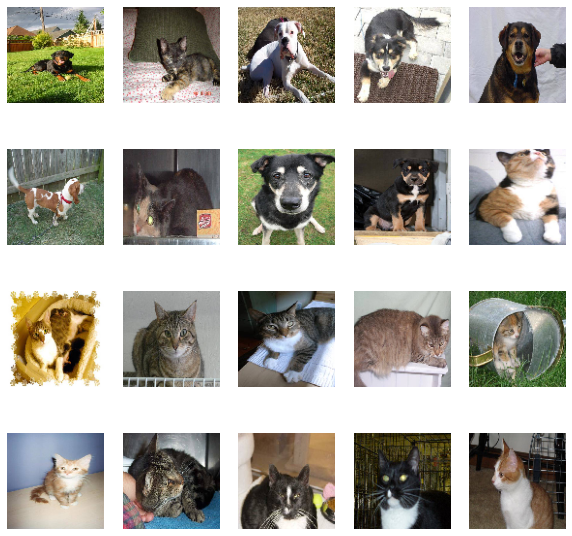

In [72]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [73]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [74]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(100,100),
    batch_size=20,
    shuffle=False, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


### CNN 적용

In [75]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(100,100,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       7

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [85]:
# steps_per_epoch = 2000//20 = train_generator.n//train_generator.batch_size
# validation_steps = 1000//20 = validation_generator.n//validation_generator.batch_size

In [84]:
history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

d:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
100/100 [==============================] - 40s 288ms/step - loss: 0.7020 - acc: 0.5025 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/40
100/100 [==============================] - 19s 184ms/step - loss: 0.6931 - acc: 0.5240 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 3/40
100/100 [==============================] - 17s 173ms/step - loss: 0.6930 - acc: 0.5120 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 4/40
100/100 [==============================] - 18s 180ms/step - loss: 0.6951 - acc: 0.5170 - val_loss: 0.6926 - val_acc: 0.5120
Epoch 5/40
100/100 [==============================] - 18s 178ms/step - loss: 0.6924 - acc: 0.5310 - val_loss: 0.6857 - val_acc: 0.5660
Epoch 6/40
100/100 [==============================] - 18s 182ms/step - loss: 0.6927 - acc: 0.5255 - val_loss: 0.6916 - val_acc: 0.5020
Epoch 7/40
100/100 [==============================] - 18s 183ms/step - loss: 0.6882 - acc: 0.5655 - val_loss: 0.6724 - val_acc: 0.5900
Epoch 8/40
100/100 [==============================] - 1

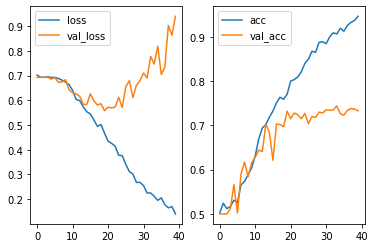

In [86]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [16]:
model.save('cats_and_dogs_model_1.h5')  # creates a HDF5 file

### Image Augmentation
- 케라스 창시자에게 배우는 딥러닝 (193쪽~)

In [87]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

In [88]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [89]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 150, 150, 3) (20,)
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0.]


In [90]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((150, 150, 3), dtype('float32'), 1.0, 0.0)

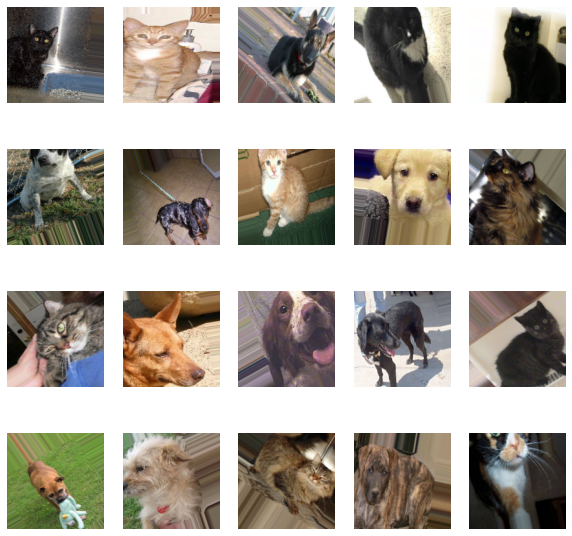

In [91]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [92]:
train_generator.reset() # 배치를 처음으로 되돌린다

In [93]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [94]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150,150),
    batch_size=20,
    shuffle=False, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [95]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [96]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['acc'])

In [26]:
history = model.fit_generator(train_generator, epochs=80, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/80
100/100 [==============================] - 18s 169ms/step - loss: 0.6926 - acc: 0.5235 - val_loss: 0.6852 - val_acc: 0.5600
Epoch 2/80
100/100 [==============================] - 17s 169ms/step - loss: 0.6829 - acc: 0.5630 - val_loss: 0.6664 - val_acc: 0.5800
Epoch 3/80
100/100 [==============================] - 17s 168ms/step - loss: 0.6745 - acc: 0.5755 - val_loss: 0.6532 - val_acc: 0.6170
Epoch 4/80
100/100 [==============================] - 17s 170ms/step - loss: 0.6693 - acc: 0.5745 - val_loss: 0.6399 - val_acc: 0.6290
Epoch 5/80
100/100 [==============================] - 17s 168ms/step - loss: 0.6462 - acc: 0.6165 - val_loss: 0.6348 - val_acc: 0.6310
Epoch 6/80
100/100 [==============================] - 17s 169ms/step - loss: 0.6403 - acc: 0.6305 - val_loss: 0.6344 - val_acc: 0.6290
Epoch 7/80
100/100 [==============================] - 17s 169ms/step - loss: 0.6235 - acc: 0.6610 - val_loss: 0.5971 - val_acc: 0.6690
Epoch 8/80
100/100 [==============================] - 1

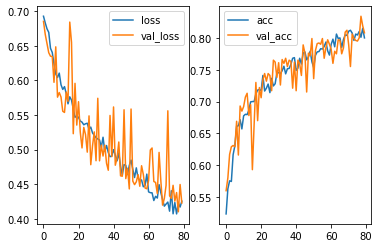

In [27]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [28]:
model.save('cats_and_dogs_model_2.h5')  # creates a HDF5 file

### 결과 테스트
- shuffle 을 False 로 놓는다

In [29]:
test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
test_generator = test_datagen.flow_from_directory(
    'cats_and_dogs_small/test',
    target_size=(150,150),
    batch_size=20,
    shuffle=False, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [31]:
pred_y = model.predict(test_generator)

In [32]:
pred_y.shape

(1000, 1)

- 앞의 500장은 cat, 뒤의 500장은 dog 임

In [33]:
(pred_y[:500,0]<0.5).sum()

410

In [34]:
(pred_y[500:,0]>0.5).sum()

399

In [37]:
(410+399)/1000

0.809